<a href="https://colab.research.google.com/github/debasisb/covid-19-Hawaii/blob/master/Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 Analysis
**bold text**

Source: The original code for the national data is from Noah Gift's book on Minimal Python. Github Source - https://github.com/debasisb/minimal-python/blob/master/Chapter7_data_science.ipynb


Import pandas and create a dataframe df for the US Covid-19 data from the NY Times GitHub content

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Display the columns of the data frame df. Shape is the dimensions of the data frame selected or the # rows and # of columns

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [6]:
df.shape

(2273, 5)

The Seaborn visualization package, is a plotting and graphical package that is used to display data on histograms, scatterplot etc.

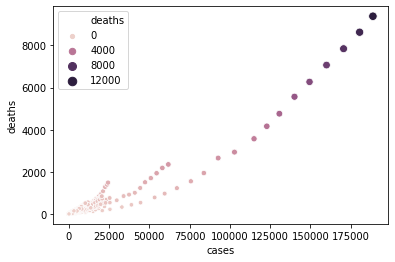

In [8]:
import seaborn as sns
sns.scatterplot (x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

Create an index of Dates from the source of the data till latest date

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-12', '2020-04-12', '2020-04-12', '2020-04-12',
               '2020-04-12', '2020-04-12', '2020-04-12', '2020-04-12',
               '2020-04-12', '2020-04-12'],
              dtype='datetime64[ns]', name='date', length=2273, freq=None)

Create the date for today, and the date two days ago (for the latest data for 2 days)

In [16]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-14
Two days ago 2020-04-12


Display the top 10 rows of data or head(10), bottom rows is tail()

In [17]:
df.loc[daybefore:today].head(10)

,state,fips,cases,deaths
date,,,,
2020-04-12,Alabama,1,3583,93
2020-04-12,Alaska,2,270,6
2020-04-12,American Samoa,60,0,0
2020-04-12,Arizona,4,3539,117
2020-04-12,Arkansas,5,1280,27
2020-04-12,California,6,23323,676
2020-04-12,Colorado,8,7303,290
2020-04-12,Connecticut,9,12035,554
2020-04-12,Delaware,10,1625,35


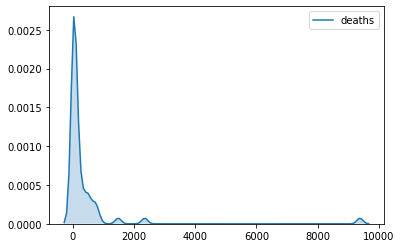

In [18]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

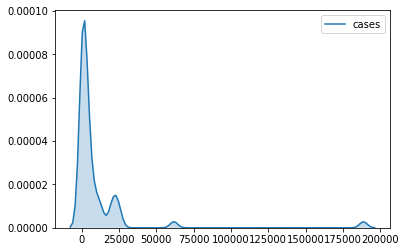

In [19]:
sns.kdeplot(df.loc[daybefore:today]["cases"], shade=True)

Create a data frame the identifies the top 10 states, sort by deaths and cases

In [24]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-12,New York,36,188694,9385
2020-04-12,New Jersey,34,61850,2350
2020-04-12,Michigan,26,24494,1486
2020-04-12,Louisiana,22,20595,840
2020-04-12,Massachusetts,25,25475,756
2020-04-12,Illinois,17,20852,727
2020-04-12,California,6,23323,676
2020-04-12,Connecticut,9,12035,554
2020-04-12,Pennsylvania,42,22955,525


In [25]:
current_df.shape

(56, 4)

In [29]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New Jersey',
 'Michigan',
 'Louisiana',
 'Massachusetts',
 'Illinois',
 'California',
 'Connecticut',
 'Pennsylvania',
 'Washington']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [31]:
set(top_states_df.state.values)

{'California',
 'Connecticut',
 'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Washington'}

Use Seaborn to create a basic line plot for the top 10 states

<Figure size 1080x360 with 0 Axes>

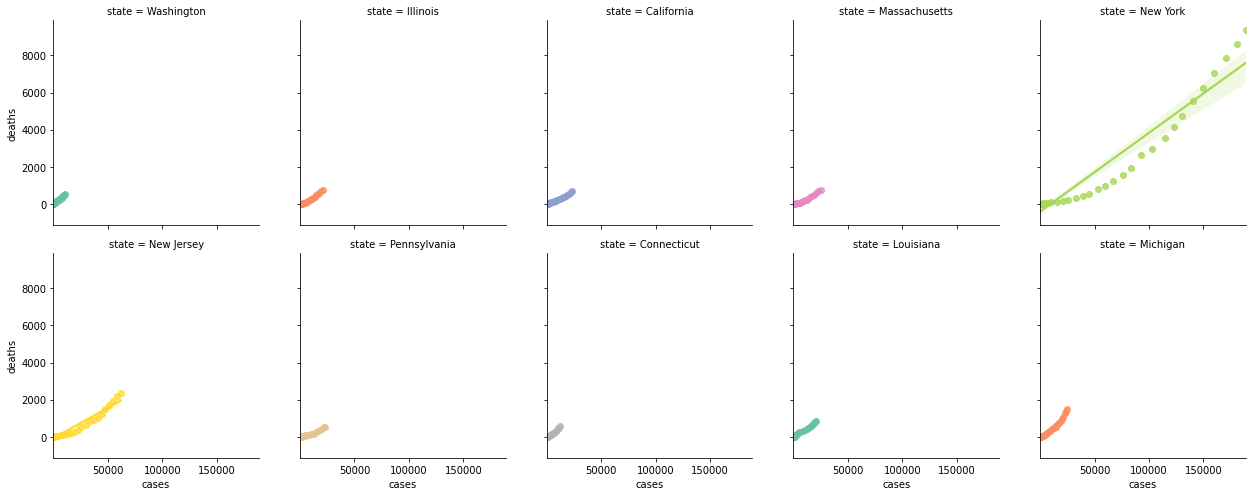

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [35]:
top_states_april_current_df = top_states_df.loc["2020-04-12":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(10)

,state,cases,deaths
date,,,
2020-04-12,New York,188694,9385
2020-04-12,New Jersey,61850,2350
2020-04-12,Michigan,24494,1486
2020-04-12,Louisiana,20595,840
2020-04-12,Massachusetts,25475,756
2020-04-12,Illinois,20852,727
2020-04-12,California,23323,676
2020-04-12,Connecticut,12035,554
2020-04-12,Pennsylvania,22955,525


Use another popular graphical tool called Plotly. This shows a scatter plot for the month of April for the top 10 states

In [36]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Import County Level Data for Hawaii

In [37]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df["state"].shape
df = df[df["state"] == "Hawaii"]
df.tail(10)

,date,county,state,fips,cases,deaths
49023,2020-04-11,Hawaii,Hawaii,15001.0,34,0
49024,2020-04-11,Honolulu,Hawaii,15003.0,348,5
49025,2020-04-11,Kauai,Hawaii,15007.0,19,0
49026,2020-04-11,Maui,Hawaii,15009.0,80,3
49027,2020-04-11,Unknown,Hawaii,NaN,3,0
51684,2020-04-12,Hawaii,Hawaii,15001.0,39,0
51685,2020-04-12,Honolulu,Hawaii,15003.0,350,6
51686,2020-04-12,Kauai,Hawaii,15007.0,21,0
51687,2020-04-12,Maui,Hawaii,15009.0,84,3
51688,2020-04-12,Unknown,Hawaii,NaN,3,0


Create a data frame for Maui County and display data for past 15 days

In [39]:
Maui_County_df = df[df["county"]== "Maui"].drop(columns = "fips")
Maui_County_df.tail(15)

,date,county,state,cases,deaths
18136,2020-03-29,Maui,Hawaii,20,0
20146,2020-03-30,Maui,Hawaii,25,0
22250,2020-03-31,Maui,Hawaii,25,0
24429,2020-04-01,Maui,Hawaii,26,0
26669,2020-04-02,Maui,Hawaii,27,0
28971,2020-04-03,Maui,Hawaii,36,0
31334,2020-04-04,Maui,Hawaii,38,0
33742,2020-04-05,Maui,Hawaii,43,0
36196,2020-04-06,Maui,Hawaii,44,1
38688,2020-04-07,Maui,Hawaii,48,1


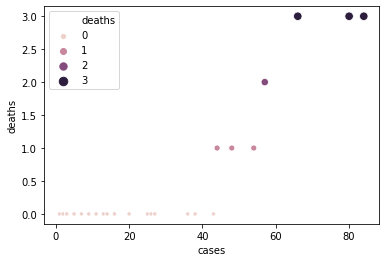

In [40]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

<Figure size 1080x360 with 0 Axes>

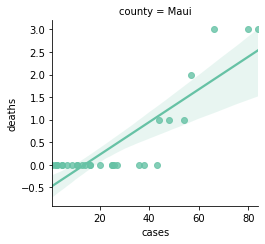

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

Create a data frame for Honolulu County and display data for past 15 days

In [42]:
Honolulu_County_df = df[df["county"]== "Honolulu"].drop(columns = "fips")
Honolulu_County_df.tail(15)

,date,county,state,cases,deaths
18134,2020-03-29,Honolulu,Hawaii,119,0
20144,2020-03-30,Honolulu,Hawaii,139,0
22248,2020-03-31,Honolulu,Hawaii,157,1
24427,2020-04-01,Honolulu,Hawaii,182,1
26667,2020-04-02,Honolulu,Hawaii,206,2
28969,2020-04-03,Honolulu,Hawaii,237,2
31332,2020-04-04,Honolulu,Hawaii,266,2
33740,2020-04-05,Honolulu,Hawaii,281,2
36194,2020-04-06,Honolulu,Hawaii,292,4
38686,2020-04-07,Honolulu,Hawaii,312,4


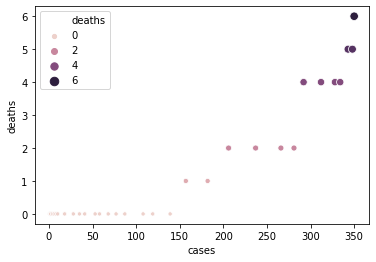

In [43]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

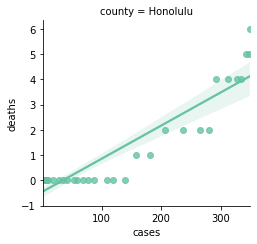

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)